In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('loan dataset.csv')
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'minority', 'sex', 'ZIP', 'rent',
       'education', 'age', 'income', 'loan_size', 'payment_timing',
       'job_stability', 'year', 'default', 'occupation'],
      dtype='object')

In [3]:
df = data.drop('Unnamed: 0', 1)
df.columns

Index(['Unnamed: 0.1', 'minority', 'sex', 'ZIP', 'rent', 'education', 'age',
       'income', 'loan_size', 'payment_timing', 'job_stability', 'year',
       'default', 'occupation'],
      dtype='object')

# Data Preprocessing


In [4]:
#Checking null values
df.isnull().sum()

Unnamed: 0.1      0
minority          0
sex               0
ZIP               0
rent              0
education         0
age               0
income            0
loan_size         0
payment_timing    0
job_stability     0
year              0
default           0
occupation        0
dtype: int64

In [5]:
df['occupation'].replace({"MZ01CD": 1.0, "MZ11CD": 11.0, "MZ10CD": 10.0}, inplace=True)

In [6]:
df['occupation'].value_counts()

1.0     79652
11.0    40214
10.0    40134
Name: occupation, dtype: int64

In [7]:
df['ZIP'].value_counts()

MT12RA    40000
MT15PA    40000
MT01RA    40000
MT04PA    40000
Name: ZIP, dtype: int64

In [8]:
df['ZIP'].replace({"MT01RA": 1.0, "MT04PA": 4.0, "MT15PA": 15.0, "MT12RA": 12.0}, inplace=True)

In [9]:
df['ZIP'].value_counts()

1.0     40000
15.0    40000
12.0    40000
4.0     40000
Name: ZIP, dtype: int64

In [10]:
df['label'] = ['1' if star == True else '0' for star in data['default']];
df

,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label
0,0,1,0,4.0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,10.0,1
1,1,0,0,4.0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,1.0,0
2,2,0,0,4.0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,1.0,0
3,3,1,0,4.0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,10.0,0
4,4,1,0,4.0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,7995,0,1,12.0,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,98.012059,49,False,1.0,0
159996,7996,0,1,12.0,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,81.323488,49,False,1.0,0
159997,7997,1,1,12.0,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,111.569970,49,False,11.0,0
159998,7998,1,1,12.0,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,110.030919,49,False,11.0,0


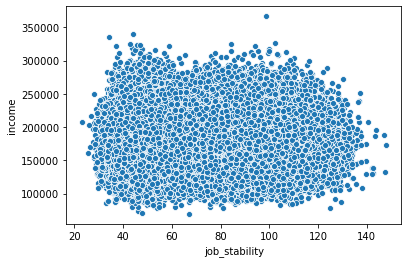

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['job_stability'], y=df['income'])


In [12]:
#Removing outliers of Job_stability attribute using z-score

df['zscore'] = ( df.job_stability - df.job_stability.mean() ) / df.job_stability.std()
df.head(5)

,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label,zscore
0,0,1,0,4.0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,10.0,1,-1.151774
1,1,0,0,4.0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,1.0,0,-1.014071
2,2,0,0,4.0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,1.0,0,-0.288076
3,3,1,0,4.0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,10.0,0,-0.604349
4,4,1,0,4.0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,10.0,0,-0.883335


In [13]:
df[(df.zscore<-3) | (df.zscore>3)]

,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label,zscore
22927,6927,0,0,12.0,0,53.343094,48.718524,207294.428709,8190.141478,3.719984,140.541977,32,False,1.0,0,3.093652
23528,7528,0,1,12.0,0,44.614621,67.620261,188001.892136,6723.300181,3.651042,146.957876,32,False,1.0,0,3.375105
39907,7907,1,1,12.0,0,46.860339,24.357682,149617.906101,6668.878241,3.129452,139.529634,34,False,11.0,0,3.049242
46358,6358,0,0,12.0,0,34.825925,43.925167,131728.621889,3919.306096,2.828570,142.423799,35,False,1.0,0,3.176204
47533,7533,1,1,12.0,0,42.652564,25.569243,138253.601838,5174.998888,2.223950,142.233123,35,False,11.0,0,3.167839
63751,7751,0,1,12.0,0,31.553143,61.412265,129923.524927,2979.584568,2.081235,141.984662,37,False,1.0,0,3.156940
94641,6641,0,0,12.0,0,48.785704,45.694286,186457.655722,2548.701204,3.635066,143.444448,41,False,1.0,0,3.220978
95411,7411,0,1,12.0,0,34.454835,42.494985,129184.477405,49.307810,3.054950,139.627365,41,False,1.0,0,3.053529
118998,6998,0,0,12.0,0,53.175067,39.287765,195201.051043,22.972103,3.024922,143.920693,44,False,1.0,0,3.241870
135811,7811,1,1,12.0,0,44.030347,20.051280,132015.878969,4741.838079,3.610823,147.426907,46,False,11.0,0,3.395681


In [14]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers = df_no_outliers.drop('zscore',1)
df_no_outliers.head()


,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label
0,0,1,0,4.0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,10.0,1
1,1,0,0,4.0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,1.0,0
2,2,0,0,4.0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,1.0,0
3,3,1,0,4.0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,10.0,0
4,4,1,0,4.0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,10.0,0


In [15]:

df_no_outliers.shape


(159987, 15)

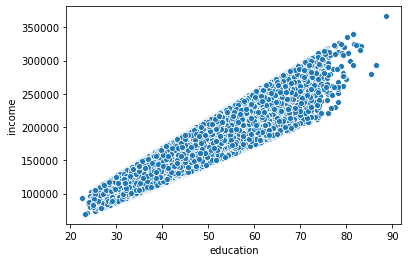

In [16]:
sns.scatterplot(x=df_no_outliers['education'], y=df_no_outliers['income'])


In [17]:
df_no_outliers['zscore1'] = ( df_no_outliers.education - df_no_outliers.education.mean() ) / df_no_outliers.education.std()
df_no_outliers = df_no_outliers[(df_no_outliers.zscore1>-3) & (df_no_outliers.zscore1<3)]
df_no_outliers = df_no_outliers.drop('zscore1',1)
df_no_outliers.head()


,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label
0,0,1,0,4.0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,10.0,1
1,1,0,0,4.0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,1.0,0
2,2,0,0,4.0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,1.0,0
3,3,1,0,4.0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,10.0,0
4,4,1,0,4.0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,10.0,0


In [18]:
df_no_outliers.shape

(159460, 15)

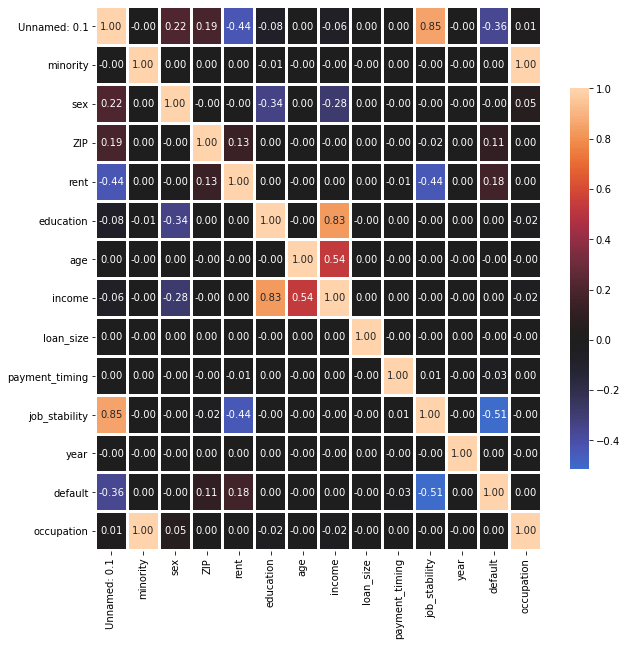

In [19]:
cor= df_no_outliers.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(cor, vmax=1.0, center=0, fmt='.2f',
                square=False, linewidths= 2.0, annot=True, cbar_kws={"shrink": .70} , ax=ax)

In [20]:
df_no_outliers['default'].value_counts()

False    135587
True      23873
Name: default, dtype: int64

In [21]:

df_no_outliers

,Unnamed: 0.1,minority,sex,ZIP,rent,education,age,income,loan_size,payment_timing,job_stability,year,default,occupation,label
0,0,1,0,4.0,1,51.265723,25.710781,166455.209729,8064.951996,3.874735,43.764963,30,True,10.0,1
1,1,0,0,4.0,0,58.882849,39.689510,216752.885725,7166.701945,3.809001,46.903977,30,False,1.0,0
2,2,0,0,4.0,0,56.504545,25.847324,183764.480788,3322.045258,3.497214,63.453467,30,False,1.0,0
3,3,1,0,4.0,1,47.074111,26.381109,154057.004978,15.223904,3.535370,56.243840,30,False,10.0,0
4,4,1,0,4.0,1,48.916960,18.779902,143463.038107,7860.534547,3.663330,49.884194,30,False,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,7995,0,1,12.0,0,52.870499,20.013553,158421.675519,1325.315567,3.561940,98.012059,49,False,1.0,0
159996,7996,0,1,12.0,0,47.928770,49.105852,186633.585503,4470.150590,3.364815,81.323488,49,False,1.0,0
159997,7997,1,1,12.0,0,39.637948,65.372574,165690.696544,8062.143776,3.880407,111.569970,49,False,11.0,0
159998,7998,1,1,12.0,0,53.646738,18.154397,155517.216520,8873.519133,3.533323,110.030919,49,False,11.0,0


In [22]:
cols = [1,2,8,9,11,12,13]
df_no_outliers.drop(df_no_outliers.columns[cols],axis=1,inplace=True)
df_no_outliers.head()

,Unnamed: 0.1,ZIP,rent,education,age,income,job_stability,label
0,0,4.0,1,51.265723,25.710781,166455.209729,43.764963,1
1,1,4.0,0,58.882849,39.689510,216752.885725,46.903977,0
2,2,4.0,0,56.504545,25.847324,183764.480788,63.453467,0
3,3,4.0,1,47.074111,26.381109,154057.004978,56.243840,0
4,4,4.0,1,48.916960,18.779902,143463.038107,49.884194,0


# Spliting into Training and Test data

In [23]:
y=df_no_outliers.label
x=df_no_outliers.drop('label',axis=1)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Different Algorithms

# 1.Logistic Regression

In [25]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs', max_iter=400)

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

In [26]:
# Performance metrics 
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))



Confusion Matrix: 
[[26269   876]
 [ 2732  2015]]


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     27145
           1       0.70      0.42      0.53      4747

    accuracy                           0.89     31892
   macro avg       0.80      0.70      0.73     31892
weighted avg       0.87      0.89      0.87     31892



In [27]:
from sklearn import metrics

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred,
                            average='weighted'))






Accuracy:  0.8868681801078641
Precision: 0.8747164378895016
Recall: 0.8868681801078641
F1 score: 0.8749927966160513


# 2.Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators= 5,criterion = 'entropy',max_depth=2,random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred1=clf.predict(x_test)

In [29]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred1))

print('Precision:', metrics.precision_score(y_test, y_pred1,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred1,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred1,
                            average='weighted'))


Accuracy:  0.981719553493039
Precision: 0.9818953293604508
Recall: 0.981719553493039
F1 score: 0.9812866589784224


In [30]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred1))
print('\n')
print(classification_report(y_test, y_pred1))


Confusion Matrix: 
[[27108    37]
 [  546  4201]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     27145
           1       0.99      0.88      0.94      4747

    accuracy                           0.98     31892
   macro avg       0.99      0.94      0.96     31892
weighted avg       0.98      0.98      0.98     31892



# 3.Decision Tree


In [31]:
from sklearn.tree import DecisionTreeClassifier 
clf_gini = DecisionTreeClassifier(criterion = "entropy", 
            random_state = 1,max_depth=2) 
clf_gini.fit(x_train, y_train)

y_pred2=clf_gini.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred2))
print('\n')
print(classification_report(y_test, y_pred2))



Accuracy: 0.985231405995234
Confusion Matrix: 
[[26755   390]
 [   81  4666]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27145
           1       0.92      0.98      0.95      4747

    accuracy                           0.99     31892
   macro avg       0.96      0.98      0.97     31892
weighted avg       0.99      0.99      0.99     31892



In [32]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred2))

print('Precision:', metrics.precision_score(y_test, y_pred2,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred2,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred2,
                            average='weighted'))


Accuracy:  0.985231405995234
Precision: 0.9859495291104852
Recall: 0.985231405995234
F1 score: 0.9854218966866187


# 4.Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred))

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy(in %): 0.9316756553367616
Confusion Matrix: 
[[25107  2038]
 [  141  4606]]


              precision    recall  f1-score   support

           0       0.99      0.92      0.96     27145
           1       0.69      0.97      0.81      4747

    accuracy                           0.93     31892
   macro avg       0.84      0.95      0.88     31892
weighted avg       0.95      0.93      0.94     31892



In [34]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

print('Precision:', metrics.precision_score(y_test, y_pred,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred,
                            average='weighted'))

Accuracy:  0.9316756553367616
Precision: 0.9495891553643921
Recall: 0.9316756553367616
F1 score: 0.9361279380421789


# 5.K-Nearest Neighbors

In [35]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred3 = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred3))
print('\n')
print(classification_report(y_test, y_pred3))


Accuracy: 0.8170387558008277
Confusion Matrix: 
[[25316  1829]
 [ 4006   741]]


              precision    recall  f1-score   support

           0       0.86      0.93      0.90     27145
           1       0.29      0.16      0.20      4747

    accuracy                           0.82     31892
   macro avg       0.58      0.54      0.55     31892
weighted avg       0.78      0.82      0.79     31892



In [36]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred3))

print('Precision:', metrics.precision_score(y_test, y_pred3,
                                    average='weighted'))
print('Recall:', metrics.recall_score(y_test, y_pred3,
                              average='weighted'))

print('F1 score:', metrics.f1_score(y_test,y_pred3,
                            average='weighted'))

Accuracy:  0.8170387558008277
Precision: 0.7777847546160427
Recall: 0.8170387558008277
F1 score: 0.7933477613786253
